In [21]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay

In [16]:
# Load and Inspect Dataset

data = load_breast_cancer()
X = data.data
y = data.target


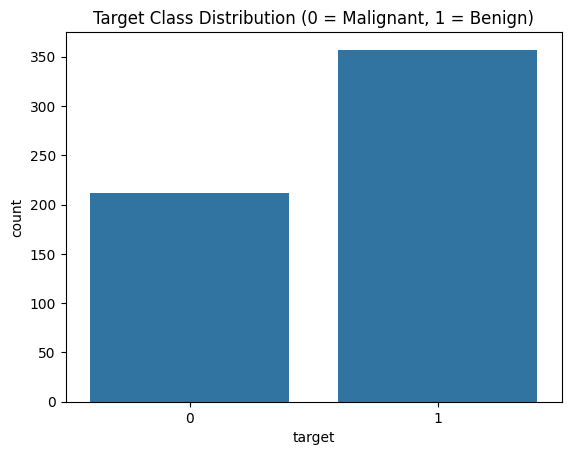

In [18]:
# Convert to DataFrame for easier plotting
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

sns.countplot(x='target', data=df)
plt.title('Target Class Distribution (0 = Malignant, 1 = Benign)')
plt.show()

In [7]:
# list of features
print(data.feature_names)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
['malignant' 'benign']


In [8]:
# list of results
print(data.target_names)

['malignant' 'benign']


In [9]:
# Train Test Split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [11]:
# Train KNN Model

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [12]:
y_pred = knn.predict(X_test)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))


Confusion Matrix:
 [[40  3]
 [ 3 68]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.93      0.93        43
           1       0.96      0.96      0.96        71

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114

Accuracy Score: 0.9473684210526315


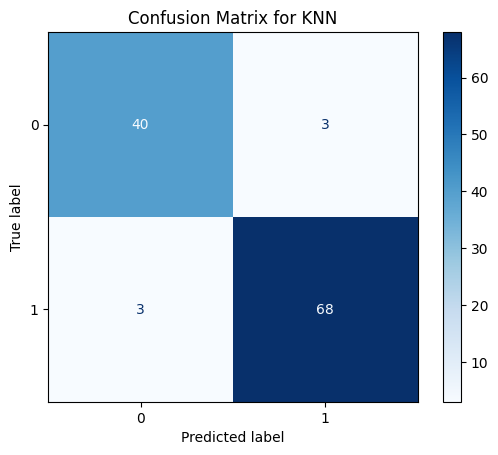

In [22]:
# Confusion Matrix Heatmap

ConfusionMatrixDisplay.from_estimator(knn, X_test, y_test, cmap='Blues')
plt.title('Confusion Matrix for KNN')
plt.show()

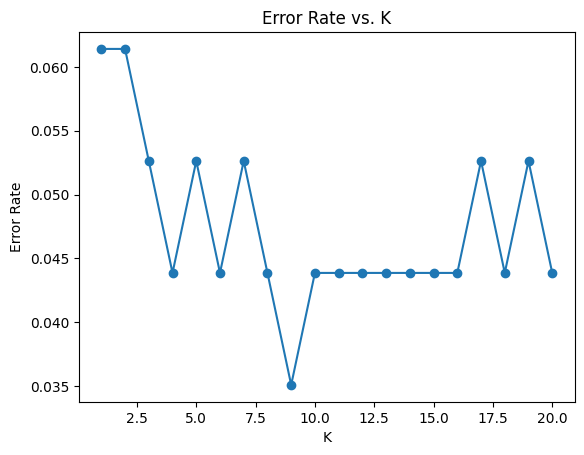

In [14]:
# Tune K
error_rate = []
for k in range(1, 21):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    error_rate.append(np.mean(preds != y_test))

plt.plot(range(1, 21), error_rate, marker='o')
plt.title('Error Rate vs. K')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()